In [36]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy import integrate

In [34]:
# Functions
def delx(data):
    delx = (np.amax(data) - np.amin(data))/(2*math.sqrt(len(data)))
    return delx

def adding_error(xdata,ydata):
    if len(xdata) != len(ydata):
        yy = [ydata]*len(xdata)
    array = [0]*len(xdata)
    for x in range(0,len(xdata)):
        xx = (xdata[x])**2
        yy = (ydata[x])**2
        array[x] = math.sqrt(xx + yy)
    return array

def prop_error_div(x, y, dx, dy):
    array = [0]*len(x)
    for t in range(0,len(x)):
        xx = x[t]
        yy = y[t]
        dxx = dx[t]
        dyy = dy[t]
        array[t] = abs(xx/yy) * math.sqrt(((dxx/xx)**2)+((dyy/yy)**2))
    return array

def prop_error_mult(x, y, dx, dy):
    array = [0]*len(x)
    for t in range(0,len(x)):
        xx = x[t]
        yy = y[t]
        dxx = dx[t]
        dyy = dy[t]
        array[t] = abs(xx*yy) * math.sqrt(((dxx/xx)**2)+((dyy/yy)**2))
    return array

def prop_error_div2(x, y, dx, dy):
    xx = x
    yy = y
    dxx = dx
    dyy = dy
    error = abs(xx/yy) * math.sqrt(((dxx/xx)**2)+((dyy/yy)**2))
    return error
        
def vjvn(data,G1,G2):
    vjvn = data*10/ ((G1*G2)**2)
    return vjvn

def arranging_data(data_array,gain_array):
    array = [0]*len(data_array)
    for x in range(0,len(data_array)):
        g1 = 600
        g1_square = g1**2
        g2_square = gain_array[x]**2
        numerator = data_array[x] * 10
        array[x] = numerator/g1_square/g2_square
    return array

def correcting_data(data_array,correction_factor):
    array = [correction_factor]*len(data_array)
    for x in range(0,len(data_array)):
        array[x] = data_array[x] - array[x]
    return array

def correcting_data_2(data_array, correction_factor, index_as_list):
#     0,1,2
#     3,4
    x = index_as_list[0]
    y = index_as_list[len(index_as_list)-1]
    test = data_array
    array = [correction_factor]*len(data_array)
    while x <= y:
        test[x] = data_array[x] - array[x]
        x = x+1
    return test

def lin_eqn(x,intercept,slope):
    y = intercept + slope *x
    return y

def plotting_function_linear(fig_num,xlabel,ylabel,title,xdata,ydata,error_in_y, model_eqn, color_of_plot, color_of_fit):
    plt.figure(fig_num)
    plt.xlabel(xlabel)                                                         # Adding an x-axis label 
    plt.ylabel(ylabel)                                                         # Adding a y-axis label
    plt.title(title)                                                           # Adding a Title to the plot
    plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = color_of_plot)
    # plt.yscale('log')  # use to make the x scale as a log relationship
    # plt.xscale('log')  # use to make the y scale as a log relationship
    plt.rcParams["figure.figsize"] = (15,10)
    ans, cov = curve_fit(model_eqn, xdata, ydata, sigma=error_in_y)            #p0: initial guess, absolute_sigma = uncertainties 
    fit_b = ans[0]
    fit_m = ans[1]
    t = np.arange(0,(np.amax(xdata)+1))
    plt.plot(t,model_eqn(t,fit_b,fit_m), label='model', c = color_of_fit)
    # chisq = sum(((ydata - model_eqn(xdata,fit_m,fit_b)) / error_in_y)**2)
    # trying to extract an error out of a fit plot
    dinter = math.sqrt(cov[0][0])
    dslope = math.sqrt(cov[1][1])
    return fit_m, fit_b, dslope, dinter

def diode_fit(fig_num,xlabel,ylabel,title,xdata,ydata,error_in_y, model_eqn, color_of_plot, color_of_fit):
    plt.figure(fig_num)
    plt.xlabel(xlabel)                                                         # Adding an x-axis label 
    plt.ylabel(ylabel)                                                         # Adding a y-axis label
    plt.title(title)                                                           # Adding a Title to the plot
    plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = color_of_plot)
    # plt.yscale('log')  # use to make the x scale as a log relationship
    # plt.xscale('log')  # use to make the y scale as a log relationship
    plt.rcParams["figure.figsize"] = (15,10)
    ans, cov = curve_fit(model_eqn, xdata, ydata, sigma=error_in_y)            #p0: initial guess, absolute_sigma = uncertainties 
    fit_b = ans[0]
    fit_m = ans[1]
    t = np.arange(0.3,1.1,0.01)
    plt.plot(t,model_eqn(t,fit_b,fit_m), label='model', c = color_of_fit)
    # chisq = sum(((ydata - model_eqn(xdata,fit_m,fit_b)) / error_in_y)**2)
    # trying to extract an error out of a fit plot
    dinter = math.sqrt(cov[0][0])
    dslope = math.sqrt(cov[1][1])
    return fit_m, fit_b, dslope, dinter

def plotting_log(fig_num,xlabel,ylabel,title,xdata,ydata,error_in_y, model_eqn, color_of_plot, color_of_fit):
    plt.figure(fig_num)
    plt.xlabel(xlabel)                                                         # Adding an x-axis label 
    plt.ylabel(ylabel)                                                         # Adding a y-axis label
    plt.title(title)                                                           # Adding a Title to the plot
    plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = color_of_plot)
    plt.yscale('log')  # use to make the x scale as a log relationship
    plt.xscale('log')  # use to make the y scale as a log relationship
    plt.rcParams["figure.figsize"] = (15,10)
    ans, cov = curve_fit(model_eqn, xdata, ydata, sigma=error_in_y)            #p0: initial guess, absolute_sigma = uncertainties 
    fit_b = ans[0]
    fit_m = ans[1]
#     t = np.arange(2000,(np.amax(xdata)+1))
#     plt.plot(t,model_eqn(t,fit_b,fit_m), label='model', c = color_of_fit)
    # chisq = sum(((ydata - model_eqn(xdata,fit_m,fit_b)) / error_in_y)**2)
    # trying to extract an error out of a fit plot
    dinter = math.sqrt(cov[0][0])
    dslope = math.sqrt(cov[1][1])
    return fit_m, fit_b, dslope, dinter


In [3]:
# Data
kb_true = 1.38064852E-23 # m^2 * kg * s^-2 * K^-1
rin1 = 1 # ohm
rf = 1000 # ohm
g1 = 600 
g2 = 2000
f1 = 100 # hz (high pass)
f2 = 100000 #hz (high pass)
del_f1 = 110961 #hz
temperature_of_room = 293 # Kelvin
#.................................................................................
trial1 = [0.977, 0.978, 0.976, 0.976, 0.977] # Volts
# Trial 2
rin2 = 100 # ohm
trial2 = [1.003, 1.004, 1.005, 1.003, 1.004] # Volts
# Trial 3
rin3 = 10 # ohm
trial3 = [0.981, 0.980, 0.982, 0.980, 0.981] # Volts
# Trial 4
rin4 = 1 # ohm
trial4 = [0.979, 0.980, 0.978, 0.977, 0.977] # Volts
# Trial 5
rin5 = 1000 # ohm
trial5 = [0.702, 0.702, 0.703, 0.701, 0.702] # Volts
g5 = 1500
# Trial 6 
rin6 = 10000 # ohm
trial6 = [0.924, 0.923, 0.923, 0.925, 0.926] # Volt
g6 = 1000
# Trial 7
rin7 = 100000 # ohm
trial7 = [0.874, 0.873, 0.872, 0.872, 0.871] # Volt
g7 = 400
# Trial 8
rin8 = 1000000 # ohm
trial8 = [0.949, 0.952, 0.948, 0.949, 0.950] # Volt
g8 = 300
#..............................................................................................................................
# Arranging data into arrays
gain_for_correction_1 = np.array([g2,g2,g2,g2]) # gain 2 (g2) values
correction_resistor_data = np.array([rin1, rin2, rin3, rin4]) # larger not added to this data set because it breaks linearity (stated in lab manual)
mean_of_trials = np.array([np.mean(trial1), np.mean(trial2), np.mean(trial3), np.mean(trial4)]) # consolidating the mean data in to a single array
delta_of_band1 = np.array([delx(trial1), delx(trial2), delx(trial3), delx(trial4)]) # Uncertainty in the mean 

# Data for Johnson Noise Dependence on Bandwidth
rinb = 10000 # ohm
# Trial 1
freq1 = [100, 100000, 110961] # [High Pass, Low Pass, Tabulated]
trialb1 = [0.926, 0.926,0.925, 0.924, 0.925] # Volt
gb1 = 1000
# Trial 2
freq2 = [300, 100000, 110739] # Hz
trialb2 = [0.923, 0.924, 0.926, 0.924, 0.925] # Volt
gb2 = gb1
# Trial 3
freq3 = [1000, 100000, 109961] # Hz
trialb3 = [0.920, 0.918, 0.918, 0.919, 0.917] # Volt
gb3 = gb1
# Trial 4
freq4 = [1000, 33000, 35543] # Hz
trialb4 = [0.660, 0.658, 0.659, 0.661, 0.662] # Volt
gb4 = 1500
trialb4_correction1 = [0.712, 0.712, 0.713, 0.711, 0.713]    # V
trialb4_correction10 = [0.713, 0.714, 0.713, 0.712, 0.713]   # V
trialb4_correction100 = [0.728, 0.729, 0.732, 0.731, 0.730]  # V
trialb4_correction1000 = [0.909, 0.907, 0.911, 0.909, 0.906] # V
gb4_correction = 3000
del_f4 = 35543 # Hz
# Trial 5
freq5 = [100, 33000, 36543] # Hz
trialb5 = [0.679, 0.676, 0.675, 0.676, 0.674] # V
gb5 = gb4
# Trial 6
freq6 = [100, 10000, 10996] # Hz
trialb6 = [0.804, 0.807, 0.801, 0.803, 0.805] # V
gb6 = 3000
trialb6_correction1 = [0.861, 0.851, 0.861, 0.863, 0.856]
trialb6_correction10 = [0.864, 0.857, 0.856, 0.857, 0.858]
trialb6_correction100 = [0.881, 0.877, 0.8800, 0.884, 0.888]
trialb6_correction1000 = [1.083, 1.093, 1.097, 1.092, 1.093]
gb6_correction = 6000
del_f6 = 10996
# Trial 7
freq7 = [1000, 10000, 9997] # Hz
trialb7 = [0.729, 0.727, 0.730, 0.731, 0.729] # Volt
gb7 = gb6
# Trial 8
freq8 = [1000, 3300, 2576] # Hz
trialb8 = [0.729, 0.727, 0.730, 0.731, 0.729] # Volt
gb8 = 6000
# Trial 9
freq9 = [100, 3300, 3554] # Hz
trialb9 = [1.06, 1.07, 1.06, 1.05, 1.05] # Volt
gb9 = gb8
trialb9_correction1 = [0.795, 0.798, 0.798, 0.800, 0.795]
trialb9_correction10 = [0.809, 0.802, 0.806, 0.803, 0.804]
trialb9_correction100 = [0.811, 0.827, 0.811, 0.825, 0.814]
trialb9_correction1000 = [1.009, 1.005, 1.006, 1.013, 1.011]
gb9_correction = 10000
#..................................................................................................................................
r_test = [1,10,100,1000]
#..................................................................................................................................
# Correction data for trial band 4
mean_of_trials_for_correction_4 = np.array([np.mean(trialb4_correction1), np.mean(trialb4_correction10), np.mean(trialb4_correction100), np.mean(trialb4_correction1000)])
delta_of_band_for_correction_4 = np.array([delx(trialb4_correction1), delx(trialb4_correction10), delx(trialb4_correction100), delx(trialb4_correction1000)])
gain_for_correction_4 = np.array([gb4_correction]*4)
#..................................................................................................................................
# Correction data for trial band 6
mean_of_trials_for_correction_6 = np.array([np.mean(trialb6_correction1), np.mean(trialb6_correction10), np.mean(trialb6_correction100), np.mean(trialb6_correction1000)])
delta_of_band_for_correction_6 = np.array([delx(trialb6_correction1), delx(trialb6_correction10), delx(trialb6_correction100), delx(trialb6_correction1000)])
gain_for_correction_6 = np.array([gb6_correction]*4)
#..................................................................................................................................
# Correction data for trail band 9
mean_of_trials_for_correction_9 = np.array([np.mean(trialb9_correction1), np.mean(trialb9_correction10), np.mean(trialb9_correction100), np.mean(trialb9_correction1000)])
delta_of_band_for_correction_9 = np.array([delx(trialb9_correction1), delx(trialb9_correction10), delx(trialb9_correction100), delx(trialb9_correction1000)])
gain_for_correction_9 = np.array([gb9_correction]*4)
#..................................................................................................................................


Correction Factor 1:  6.7876795854537985e-12


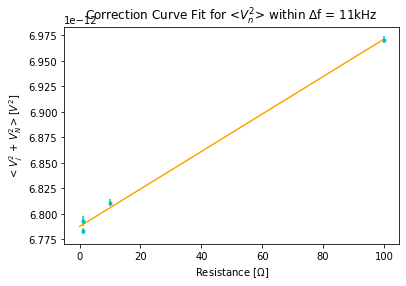

In [4]:
# correction of data for del_f = 11kHz
inferred_data_1 = arranging_data(mean_of_trials, gain_for_correction_1) # <vj^2 +vn^2>_inferred
# print(inferred_data_1)
inferred_data_1_delta = arranging_data(delta_of_band1,gain_for_correction_1)
# print(inferred_data_1_delta)
x = 'Resistance [$\Omega$]'
y = '$<V_j^2$ + $V_N^2> [V^2]$'
t = 'Correction Curve Fit for <$V_n^2$> within $\Delta$f = 11kHz'
m1, vn1, dm1, dvn1 = plotting_function_linear(1,x,y,t,correction_resistor_data,inferred_data_1,inferred_data_1_delta,lin_eqn,'c','orange')
print('Correction Factor 1: ',vn1)

Boltzmann Constant 1:  1.3708168483312325e-23  +/-  1.2030127096590048e-25


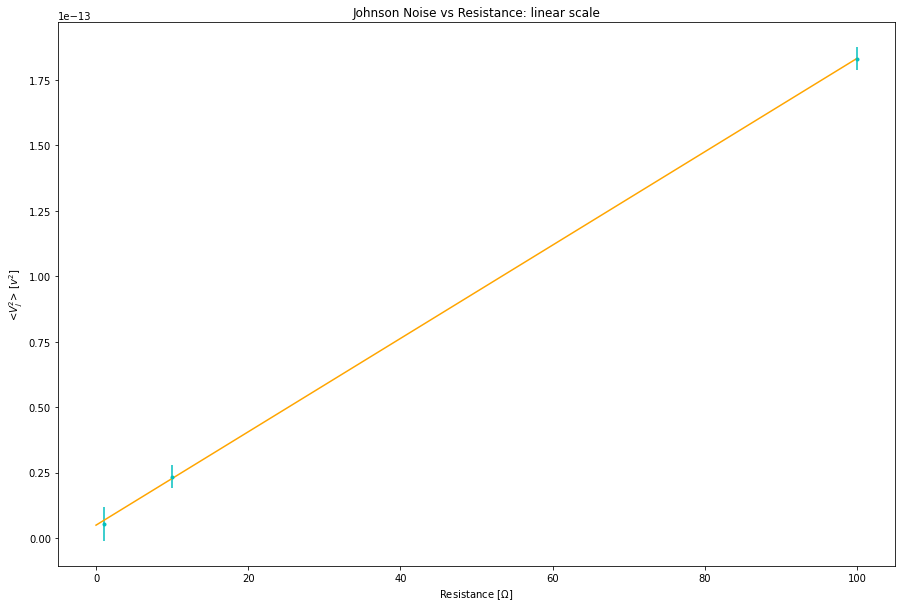

In [5]:
# Array for Linear Plot
resistor_data_corrected_1 = np.array([rin2, rin3, rin4])
# print(resistor_data_corrected_1)
corrected_data_1 = correcting_data(inferred_data_1, vn1)
# print(corrected_data_1)
corrected_delta_band_1 = adding_error(inferred_data_1_delta,inferred_data_1_delta)
x = 'Resistance [$\Omega$]'
yj = '<$V_j^2$> [$v^2$]'
tt = 'Johnson Noise vs Resistance: linear scale'
m1_corrected, trial1_intercept, dm1_corrected, dtrial1_intercept = plotting_function_linear(2,x,yj,tt,resistor_data_corrected_1,corrected_data_1[1:4],corrected_delta_band_1[1:4],lin_eqn,'c','orange')
kb = m1_corrected / (4*temperature_of_room*del_f1)
dkb = dm1_corrected / (4*temperature_of_room*del_f1)
print('Boltzmann Constant 1: ', kb, ' +/- ', dkb)

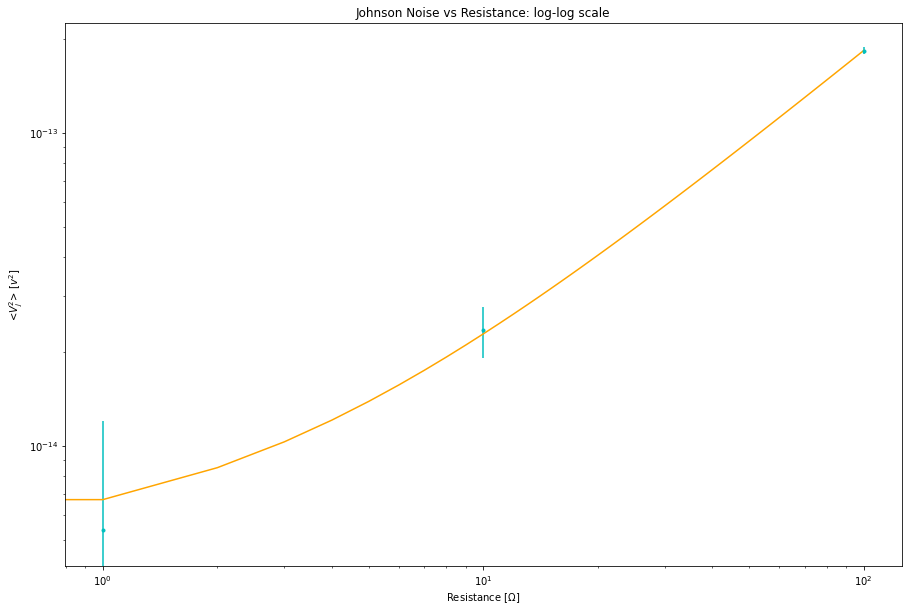

In [6]:
# log-log plot of the noise vs resistance
xlabel = 'Resistance [$\Omega$]'
ylabel = '<$V_j^2$> [$v^2$]'
title = 'Johnson Noise vs Resistance: log-log scale'
xdata = resistor_data_corrected_1
ydata = corrected_data_1[1:4]
error_in_y = corrected_delta_band_1[1:4]

plt.figure(19)
plt.xlabel(xlabel)                                                         # Adding an x-axis label 
plt.ylabel(ylabel)                                                         # Adding a y-axis label
plt.title(title)                                                           # Adding a Title to the plot
plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = 'c')
plt.yscale('log')  # use to make the x scale as a log relationship
plt.xscale('log')  # use to make the y scale as a log relationship
plt.rcParams["figure.figsize"] = (15,10)
ans, cov = curve_fit(lin_eqn, xdata, ydata, sigma=error_in_y)            #p0: initial guess, absolute_sigma = uncertainties 
fit_b = ans[0]
fit_m = ans[1]
t = np.arange(0,(np.amax(xdata)+1))
plt.plot(t,lin_eqn(t,fit_b,fit_m), label='model', c = 'orange')
# chisq = sum(((ydata - model_eqn(xdata,fit_m,fit_b)) / error_in_y)**2)
# trying to extract an error out of a fit plot
dinter = math.sqrt(cov[0][0])
dslope = math.sqrt(cov[1][1])

Correction Factor:  2.1956717451409515e-12  +/-  1.3216927823246272e-15


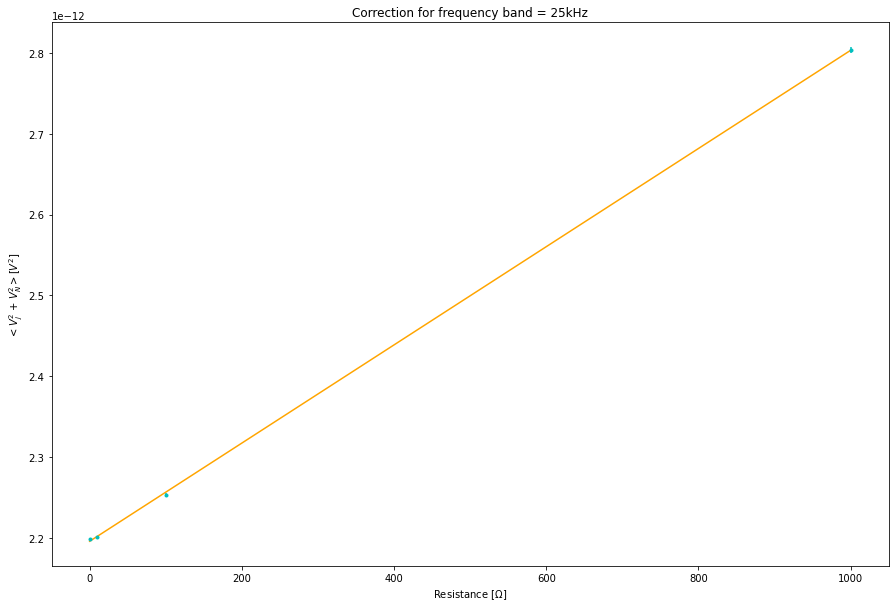

In [7]:
# Corrections for the Band 4
inferred_data_f2 = arranging_data(mean_of_trials_for_correction_4, gain_for_correction_4) # <vj^2 +vn^2>_inferred
inferred_data_1_delta_4 = arranging_data(delta_of_band_for_correction_4, gain_for_correction_4)
xl = 'Resistance $[\Omega]$'
yl = '$<V_j^2$ + $V_N^2> [V^2]$'
ti = 'Correction for frequency band = 25kHz'
m4c, cb4, dm4c, dcb4 = plotting_function_linear(3,xl,yl,ti,r_test,inferred_data_f2,inferred_data_1_delta_4,lin_eqn,'c','orange')
print('Correction Factor: ', cb4, ' +/- ', dcb4)

Correction Factor:  6.613916595208685e-13  +/-  6.590793957114521e-16


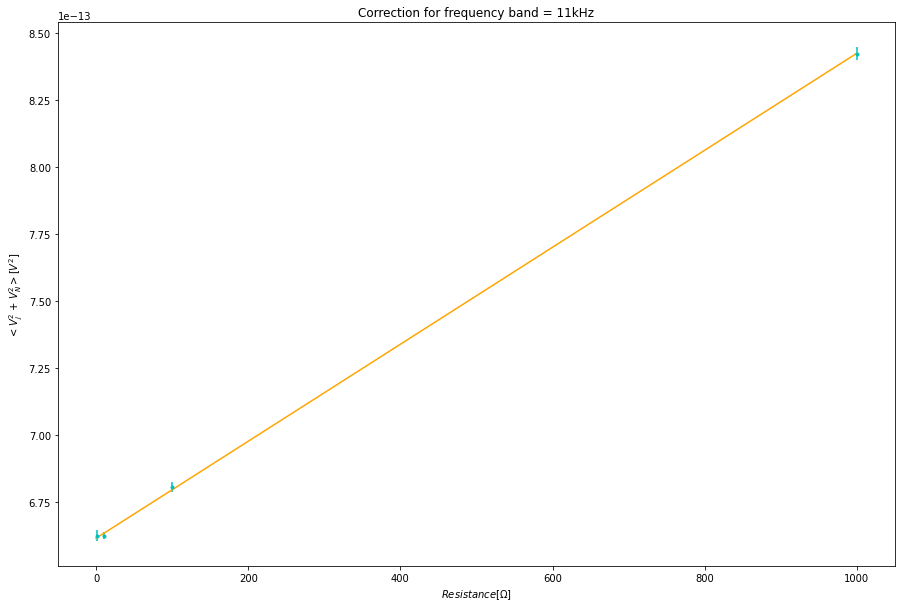

In [8]:
# Corrections for the Band 6
inferred_data_f3 = arranging_data(mean_of_trials_for_correction_6, gain_for_correction_6) # <vj^2 +vn^2>_inferred
inferred_data_1_delta_6 = arranging_data(delta_of_band_for_correction_6,gain_for_correction_6)
xl = '$Resistance [\Omega]$'
yl = '$<V_j^2$ + $V_N^2> [V^2]$'
ti = 'Correction for frequency band = 11kHz'
m6c, cb6, dm6c, dcb6 = plotting_function_linear(4,xl,yl,ti,r_test,inferred_data_f3,inferred_data_1_delta_6,lin_eqn,'c','orange')
kb = m1_corrected / (4*temperature_of_room*del_f1)
dkb = dm1_corrected / (4*temperature_of_room*del_f1)
print('Correction Factor: ', cb6, ' +/- ', dcb6)

Correction Factor:  2.2188333491339642e-13  +/-  5.306748797158746e-16


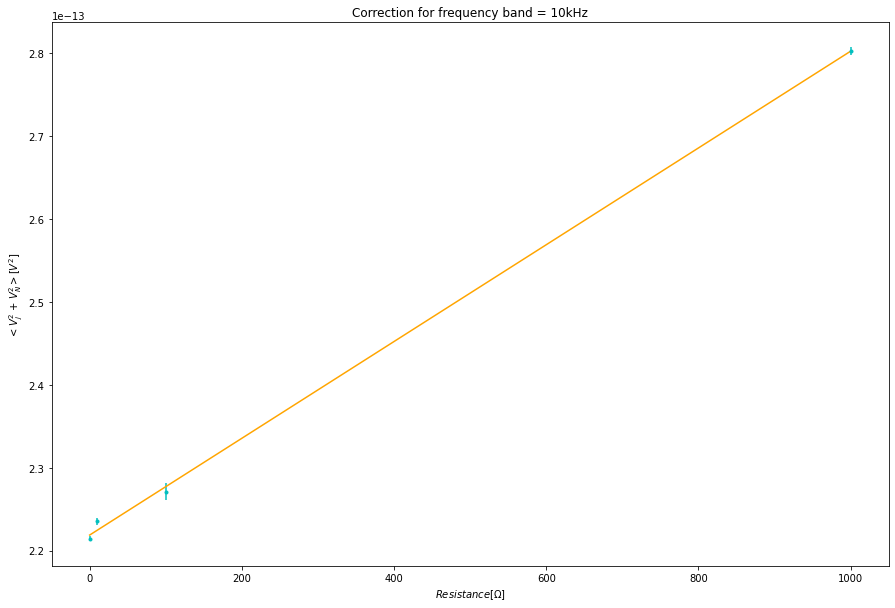

In [9]:
# Corrections for the Band 9
inferred_data_f4 = arranging_data(mean_of_trials_for_correction_9, gain_for_correction_9) # <vj^2 +vn^2>_inferred
inferred_data_1_delta_9 = arranging_data(delta_of_band_for_correction_9,gain_for_correction_9)
xl = '$Resistance [\Omega]$'
yl = '$<V_j^2$ + $V_N^2> [V^2]$'
ti = 'Correction for frequency band = 10kHz'
m9c, cb9, dm9c, dcb9 = plotting_function_linear(4,xl,yl,ti,r_test,inferred_data_f4,inferred_data_1_delta_9,lin_eqn,'c','orange')
print('Correction Factor: ', cb9, ' +/- ', dcb9)


In [10]:
# Creating Arrays for the frequencies
freq_high_pass_array = np.array([freq1[0], freq2[0], freq3[0], freq4[0], freq5[0], freq6[0], freq7[0], freq8[0], freq9[0]])  # independent var
freq_low_pass_array = np.array([freq1[1], freq2[1], freq3[1], freq4[1], freq5[1], freq6[1], freq7[1], freq8[1], freq9[1]]) # independent var
freq_diff_array = np.array([(freq1[1]-freq1[0]), (freq2[1]-freq2[0]), (freq3[1]-freq3[0]), (freq4[1]-freq4[0]), (freq5[1]-freq5[0]),(freq6[1]-freq6[0]), (freq7[1]-freq7[0]), (freq8[1]-freq8[0]), (freq9[1]-freq9[0])])
freq_range_array = np.array([freq1[2], freq2[2], freq3[2], freq4[2], freq5[2], freq6[2], freq7[2], freq8[2], freq9[2]]) # independent var
freq_dependent_data = np.array([np.mean(trialb1),np.mean(trialb2),np.mean(trialb3),np.mean(trialb4),np.mean(trialb5),np.mean(trialb6),np.mean(trialb7),np.mean(trialb8),np.mean(trialb9)])
freq_dependent_delta= np.array([delx(trialb1),delx(trialb2),delx(trialb3),delx(trialb4),delx(trialb5),delx(trialb6),delx(trialb7),delx(trialb8),delx(trialb9)])
freq_dependent_gain = np.array([gb1,gb2,gb3,gb4,gb5,gb6,gb7,gb8,gb9])
error_from_fits = np.array([dvn1,dvn1,dvn1,dcb4,dcb4,dcb6,dcb6,dcb9,dcb9])


In [11]:
# Creating a Data Array for Frequency Dependence
corrected_freq_dependent = arranging_data(freq_dependent_data,freq_dependent_gain)
corrected_freq_dependent = correcting_data_2(corrected_freq_dependent,vn1,[0,1,2])
corrected_freq_dependent = correcting_data_2(corrected_freq_dependent,cb4,[3,4])
corrected_freq_dependent = correcting_data_2(corrected_freq_dependent,cb6,[5,6])
corrected_freq_dependent = correcting_data_2(corrected_freq_dependent,cb9,[7,8])
corrected_freq_delta = arranging_data(freq_dependent_delta,freq_dependent_gain)
corrected_freq_delta = adding_error(corrected_freq_delta, error_from_fits)


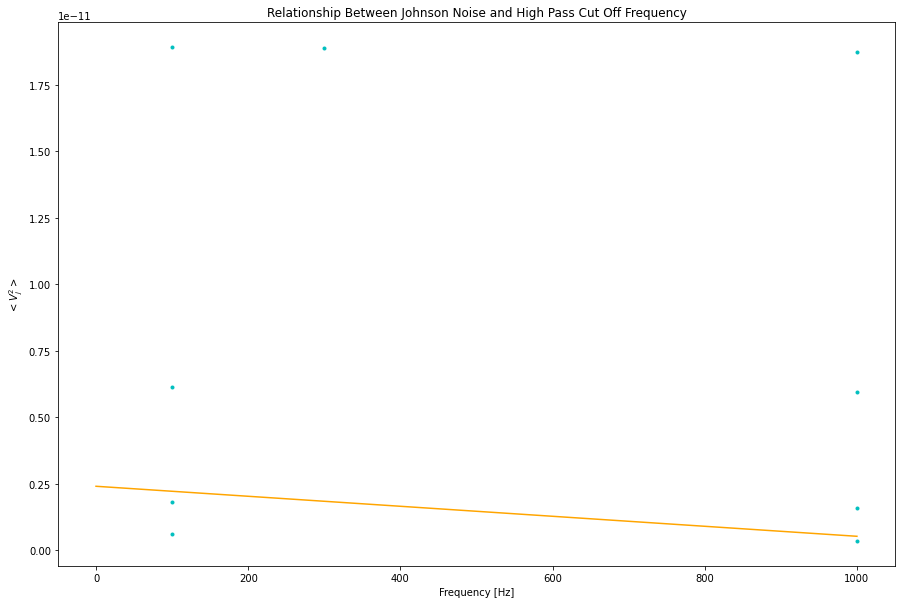

In [12]:
# Looking at the Relationship between High Pass f and Johnson Noise
x = 'Frequency [Hz]'
yj = '$<V_j^2>$'
tt = 'Relationship Between Johnson Noise and High Pass Cut Off Frequency'
lpm1, lpb1, dlpm1, dlpb1 = plotting_function_linear(5,x,yj,tt,freq_high_pass_array,corrected_freq_dependent,corrected_freq_delta,lin_eqn,'c','orange')
# just showing that johnson noise not dependent on the high pass cut off freq

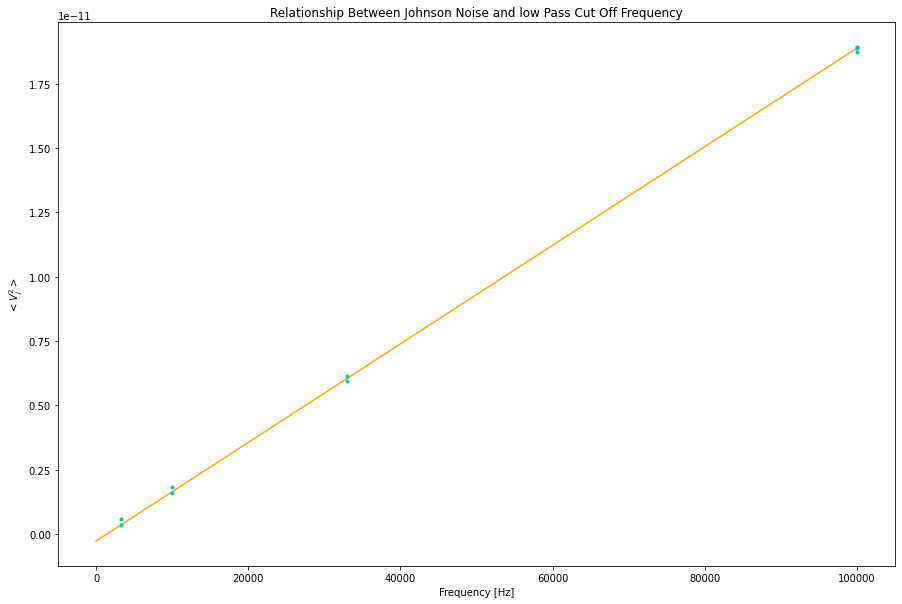

In [13]:
# Looking at the Relationship between low Pass f and Johnson Noise
x = 'Frequency [Hz]'
yj = '$<V_j^2>$'
tt = 'Relationship Between Johnson Noise and low Pass Cut Off Frequency'
lpm2, lpb2, dlpm2, dlpb2 = plotting_function_linear(6,x,yj,tt,freq_low_pass_array,corrected_freq_dependent,corrected_freq_delta,lin_eqn,'c','orange')
# seems to be some sort of relationship between the johnson noise and low pass cut off freq. Could be from how small our high pass cut off freq is.

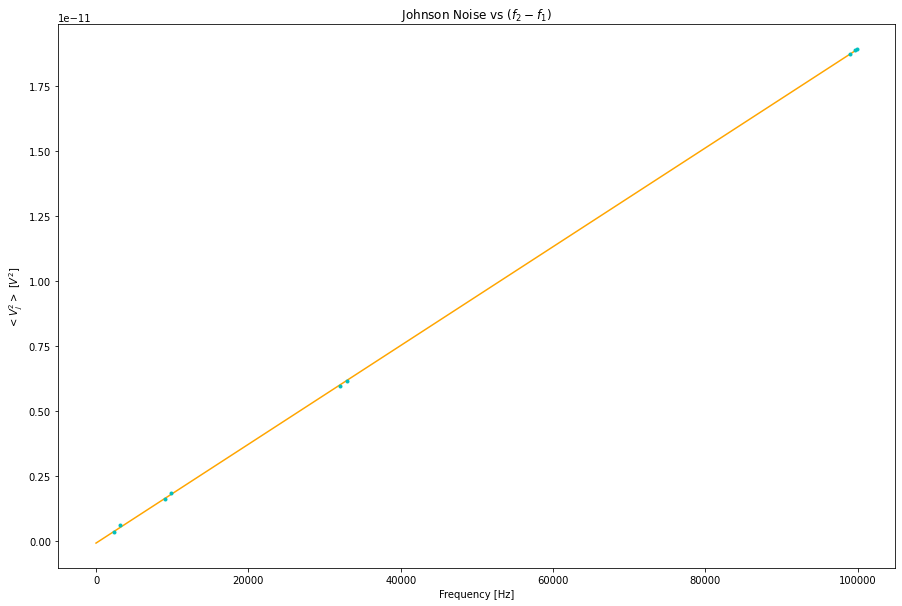

In [14]:
# Looking at the Relationship between f_2 - f_1 and Johnson Noise
x = 'Frequency [Hz]'
yj = '$<V_j^2>$ [$V^2$]'
tt = 'Johnson Noise vs ($f_2 - f_1$)'
lpm3, lpb3, dlpm3, dlpb3 = plotting_function_linear(7,x,yj,tt,freq_diff_array,corrected_freq_dependent,corrected_freq_delta,lin_eqn,'c','orange')
# there seems to be some linear relationship between f2-f1. This is to be expected because the relationship is dependent on a delta f

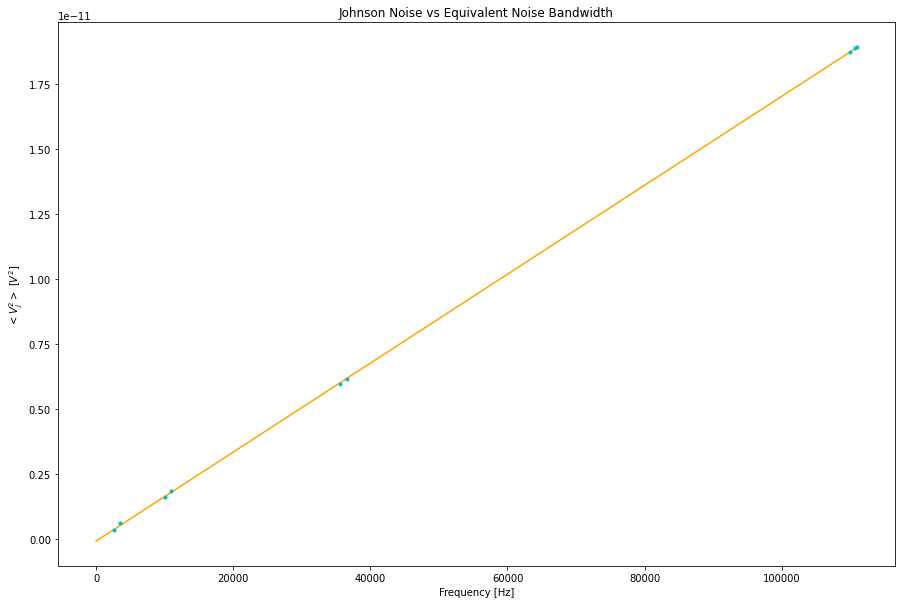

In [29]:
# Looking at the Relationship between table frequency and Johnson Noise
x = 'Frequency [Hz]'
yj = '$<V_j^2>$ [$V^2$]'
tt = 'Johnson Noise vs Equivalent Noise Bandwidth'
lpm4, lpb4, dlpm4, dlpb4 = plotting_function_linear(8,x,yj,tt,freq_range_array,corrected_freq_dependent,corrected_freq_delta,lin_eqn,'c','orange')
# there seems to be some linear relationship between f2-f1. This is to be expected because the relationship is dependent on a delta f

Noise Density Theory  1.61812006544e-20
Noise Density Experiment  1.6755717651847984e-20


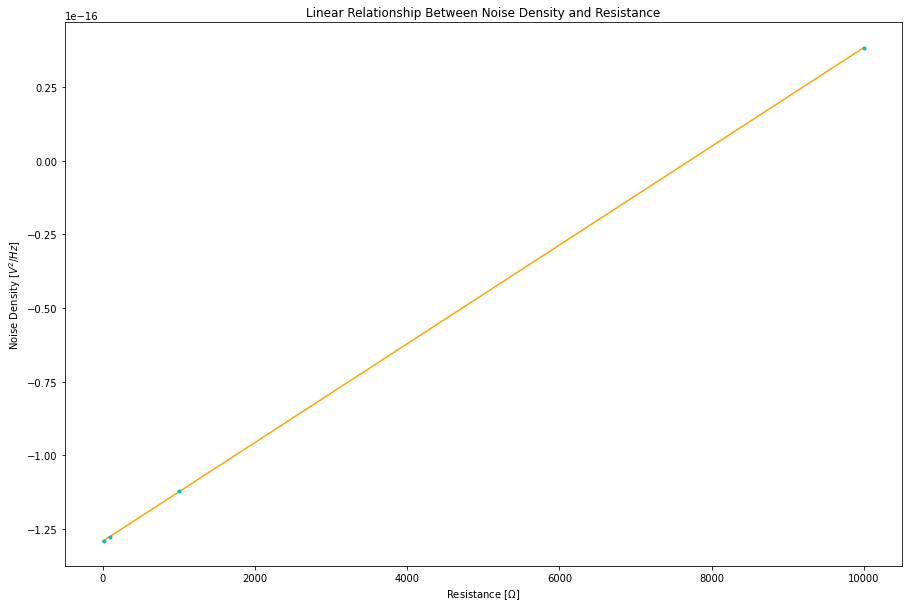

In [16]:
# Seeing if Noise Density is linearly dependent on R
r_vals = np.array([10,100,1000,10000])
gain_noise_density = np.array([gb4_correction,gb4_correction,gb4_correction,gb4])
noise_density_dependent = np.array([np.mean(trialb4_correction10),np.mean(trialb4_correction100),np.mean(trialb4_correction1000),np.mean(trialb4)])
corrected_noise_density = arranging_data(noise_density_dependent,gain_noise_density)
corrected_noise_density = correcting_data(corrected_noise_density, vn1)
corrected_noise_density = np.divide(corrected_noise_density, freq4[2])
noise_density_delta = np.array([delx(trialb4_correction10),delx(trialb4_correction100),delx(trialb4_correction1000),delx(trialb4)])
noise_density_delta = arranging_data(noise_density_delta,gain_noise_density)
error_from_fits_2 = np.array([dvn1]*4)
noise_density_delta = adding_error(noise_density_delta,error_from_fits_2)
noise_density_delta = np.divide(noise_density_delta, freq4[2])
x = 'Resistance [$\Omega$]'
yj = 'Noise Density [$V^2/Hz$]'
tt = 'Linear Relationship Between Noise Density and Resistance'

ndm1, ndb1, dndm1, dndb1 = plotting_function_linear(9,x,yj,tt,r_vals,corrected_noise_density,noise_density_delta,lin_eqn,'c','orange')
m_theory_noise_density = 4*kb_true*293
print('Noise Density Theory ',m_theory_noise_density)
print('Noise Density Experiment ',ndm1) # noise density slope


In [17]:
# Johnson Noise Density and Boltzmann's Constant
# we had a linear relationship between noise density and R -> spectral noise density (uniform noise density)
# slope of line has units Joules

# reporting a value for kb
kb = ndm1 / (4*temperature_of_room)
dkb = dndm1 /(4*temperature_of_room)
print(f'kb = {kb} +/- {dkb}')

kb = 1.4296687416252544e-23 +/- 4.812014200345915e-26


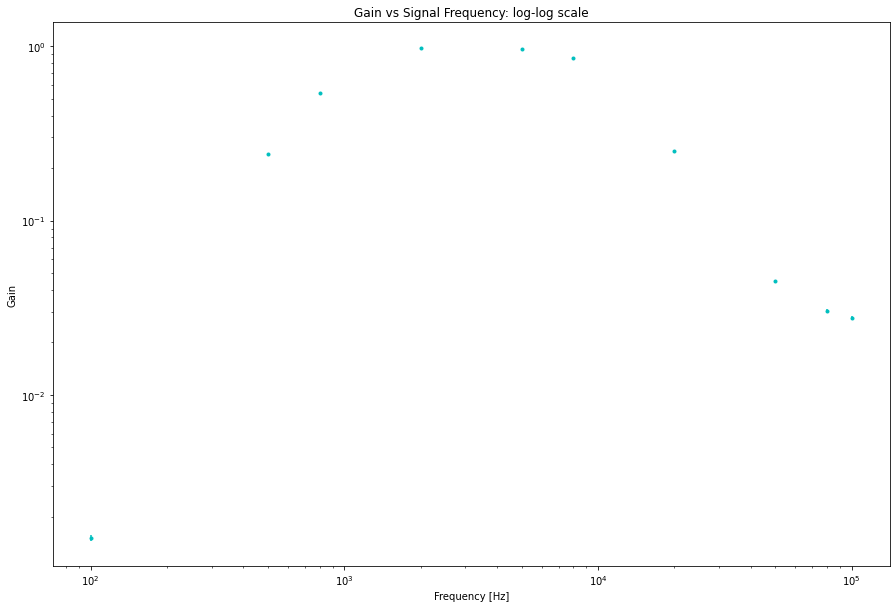

In [30]:
# Noise Density 
#..................................................................................................................................
# Data for Noise Density
freq_nd = np.multiply(np.array([0.1,0.5,0.8,2,5,8,20,50,80,100]),1000)
# logged_freq_nd = np.log10(freq_nd)
rms_1 = np.array([1.59, 1.54, 1.35, 1.34, 1.33, 1.40, 1.40, 1.43, 1.39, 1.38])
drms_1 =np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
rms_2 = np.array([0.0024, 0.370, 0.723, 1.31, 1.29, 1.20, 0.352, 0.064, 0.042, 0.038])
drms_2 =np.array([0.0001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001])
gain = np.divide(rms_2,rms_1)
# logged_freq_profile = np.log10(frequency_profile)
egain = prop_error_div(rms_2,rms_1,drms_2,drms_1)
# logged_error_freq_nd = np.log10(error_freq_profile)

#..................................................................................................................................
# Exercise 1
x = 'Frequency [Hz]'
yj = 'Gain'
tt = 'Gain vs Signal Frequency: log-log scale'
fpm1, fpb1, dfpm1, dfpb1 = plotting_log(10,x,yj,tt,freq_nd,gain,egain,lin_eqn,'c','orange')


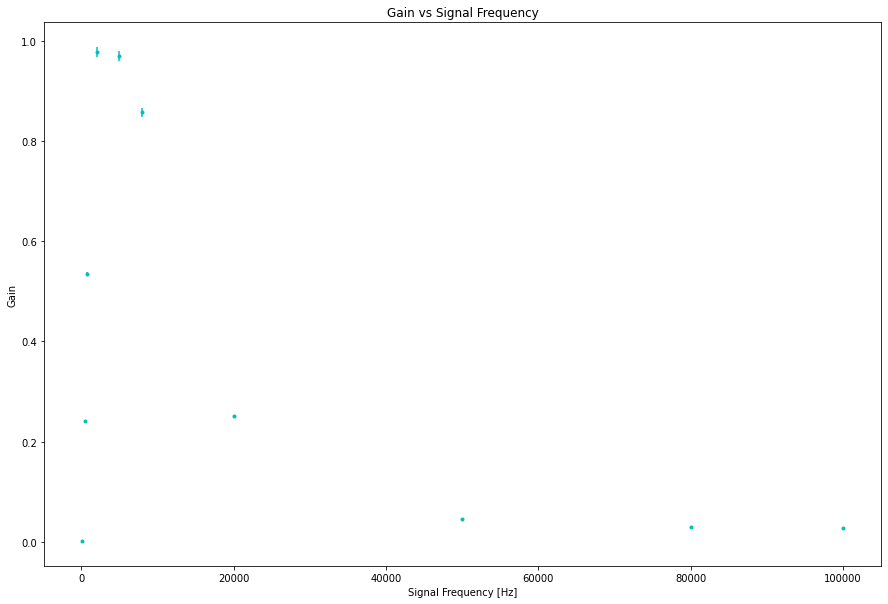

In [33]:
# linear plot of Gain vs Frequency
xlabel = 'Signal Frequency [Hz]'
ylabel = 'Gain'
title = 'Gain vs Signal Frequency: log-log scale'
xdata = freq_nd
ydata = gain
error_in_y = egain

plt.figure(20)
plt.xlabel(xlabel)                                                         # Adding an x-axis label 
plt.ylabel(ylabel)                                                         # Adding a y-axis label
plt.title(title)                                                           # Adding a Title to the plot
plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = 'c')
# plt.yscale('log')  # use to make the x scale as a log relationship
# plt.xscale('log')  # use to make the y scale as a log relationship
plt.rcParams["figure.figsize"] = (15,10)
# ans, cov = curve_fit(lin_eqn, xdata, ydata, sigma=error_in_y)            #p0: initial guess, absolute_sigma = uncertainties 
# fit_b = ans[0]
# fit_m = ans[1]
# t = np.arange(0,(np.amax(xdata)+1))
# plt.plot(t,lin_eqn(t,fit_b,fit_m), label='model', c = 'orange')
# chisq = sum(((ydata - model_eqn(xdata,fit_m,fit_b)) / error_in_y)**2)
# trying to extract an error out of a fit plot
dinter = math.sqrt(cov[0][0])
dslope = math.sqrt(cov[1][1])

9025.284174720693


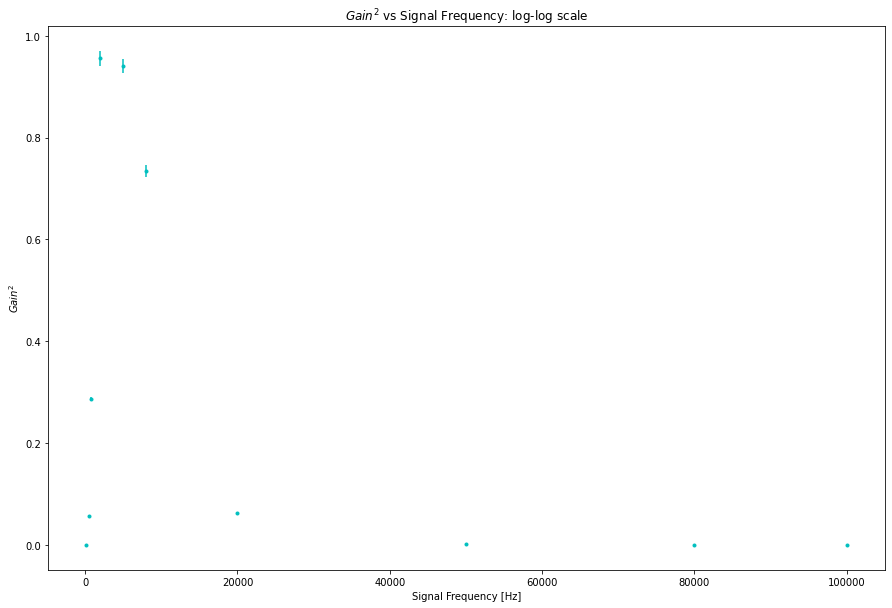

In [37]:
# gain^2 vs Signal Frequency and Area under the curve using simpsons method of integration

xlabel = 'Signal Frequency [Hz]'
ylabel = '$Gain^2$'
title = '$Gain^2$ vs Signal Frequency: log-log scale'
xdata = freq_nd
ydata = np.multiply(gain,gain)
error_in_y = prop_error_mult(gain,gain,egain,egain)

plt.figure(21)
plt.xlabel(xlabel)                                                         # Adding an x-axis label 
plt.ylabel(ylabel)                                                         # Adding a y-axis label
plt.title(title)                                                           # Adding a Title to the plot
plt.errorbar(xdata, ydata, yerr=error_in_y, fmt = '.', c = 'c')
plt.rcParams["figure.figsize"] = (15,10)

# area under the curve
ysimp = integrate.simps(ydata,xdata, even='avg')
print(ysimp)


In [19]:
# Temperature Dependent
# Data for Temp Dependent
f1_td = 1000  # Hz
f2_td = 10000 # Hz
g1 = 600

#..................................................................................................................................
# Room Temp
ra_293 = 11.29 # ohm
rb_293 = 9.96*1000 # ohm
rc_293 = 100.55*1000 # ohm
r_vals_293 = np.array([ra_293, rb_293, rc_293])
v_out_ra_293 = np.array([0.774, 0.774, 0.776, 0.775, 0.778]) # Volts (data for room temp with R = Ra)
v_out_rb_293 = np.array([0.722, 0.723, 0.721, 0.722, 0.721]) # Volts (data for room temp with R = Rb)
v_out_rc_293 = np.array([0.997, 0.998, 0.994, 0.998, 0.999]) # Volts (data for room temp with R = Rc)
mean_293 = np.array([np.mean(v_out_ra_293),np.mean(v_out_rb_293),np.mean(v_out_rc_293)])
dmean_293 = np.array([delx(v_out_ra_293), delx(v_out_rb_293), delx(v_out_rc_293)])
g_293 = np.array([6000, 3000, 1500]) # gain values for room temp data (Ra, Rb, Rc)
c1_293 = 0.438 # microamp


#..................................................................................................................................
# 77 Kelvin
ra_77 = 11.27 # ohm
rb_77 = 9.990*1000 # ohm
rc_77 = 99.52*1000 # ohm
r_vals_77 = np.array([ra_77, rb_77, rc_77])
v_out_ra_77 = np.array([0.782, 0.781, 0.780, 0.781, 0.781])
v_out_rb_77 = np.array([0.931, 0.927, 0.933, 0.922, 0.928])
v_out_rc_77 = np.array([1.238, 1.250, 1.244, 1.230, 1.244])
mean_77 = np.array([np.mean(v_out_ra_77),np.mean(v_out_rb_77),np.mean(v_out_rc_77)])
dmean_77 = np.array([delx(v_out_ra_77),delx(v_out_rb_77),delx(v_out_rc_77)])
g_77 = np.array([6000, 5000, 3000])
c1_77 = 0.9899  # microamp
c10_77 = 1.0062 # microamp
#..................................................................................................................................
# 100 Kelvin
ra_100 = 11.36 # ohm
rb_100 = 9.981*1000 # ohm
rc_100 = 99.66*1000 # ohm
r_vals_100 = np.array([ra_100, rb_100, rc_100])
v_out_ra_100 = np.array([0.776, 0.778, 0.782, 0.784, 0.784])
v_out_rb_100 = np.array([1.018, 1.025, 1.027, 1.030, 1.029])
v_out_rc_100 = np.array([0.662, 0.663, 0.661, 0.662, 0.661])
mean_100 = np.array([np.mean(v_out_ra_100),np.mean(v_out_rb_100),np.mean(v_out_rc_100)])
dmean_100 = np.array([delx(v_out_ra_100),delx(v_out_rb_100),delx(v_out_rc_100)])
g_100 = np.array([6000, 5000, 2000])
c1_100 = 0.943
c10_100 = 0.963

#..................................................................................................................................
# 150 Kelvin
ra_150 = 11.21 # ohm
rb_150 = 9.966*1000 # ohm
rc_150 = 99.98*1000 # ohm
r_vals_150 = np.array([ra_150, rb_150, rc_150])
v_out_ra_150 = np.array([0.786, 0.785, 0.787, 0.780, 0.784])
v_out_rb_150 = np.array([0.814, 0.815, 0.819, 0.820, 0.818])
v_out_rc_150 = np.array([0.946, 0.950, 0.948, 0.946, 0.947])
mean_150 = np.array([np.mean(v_out_ra_150),np.mean(v_out_rb_150),np.mean(v_out_rc_150)])
dmean_150 = np.array([delx(v_out_ra_150),delx(v_out_rb_150),delx(v_out_rc_150)])
g_150 = np.array([6000, 4000, 2000])
c1_150 = 0.7950
c10_150 = 0.8251


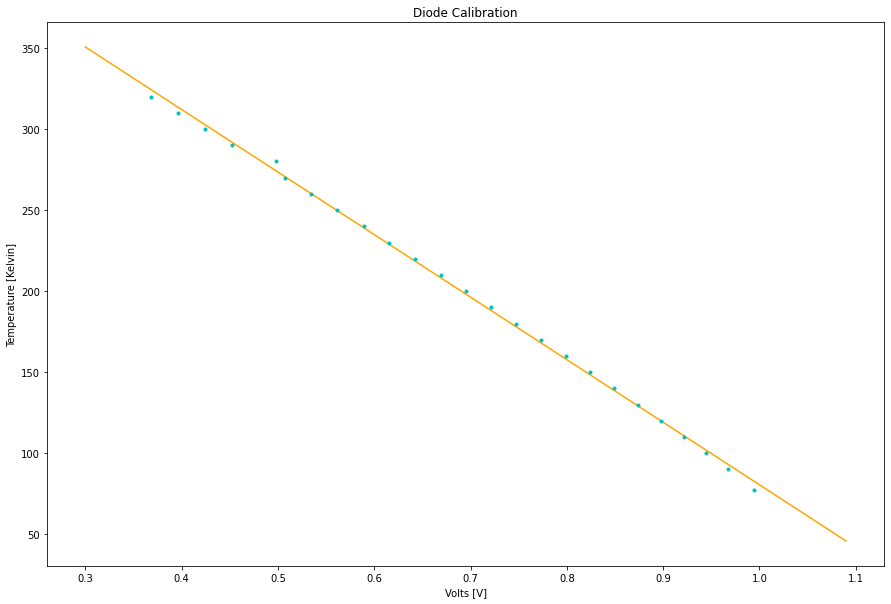

In [20]:
# Diode Calibration Curve
temp_diode = np.array([77.320,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320]) # Kelvin
vout_diode = np.array([994.419,967.032,944.477,921.305,897.616,873.417,848.864,823.964,798.691,773.213,747.485,721.533,695.363,669.002,642.448,615.748,588.907,561.837,534.655,507.311,497.881,452.258,424.465,396.645,368.731]) # mV
vout_diode = np.divide(vout_diode,1000)
vout_diode_error = np.array([0.001]*len(vout_diode))
xlab = 'Volts [V]'
ylab = 'Temperature [Kelvin]'
titlelab = 'Diode Calibration'
v_diode_m, v_diode_b, dv_diode_m, dv_diode_b = diode_fit(11,xlab,ylab,titlelab,vout_diode,temp_diode,vout_diode_error,lin_eqn,'c','orange')

# Extracting Temperature Data from the Fit
temp1 = v_diode_m*c1_293+v_diode_b
temp2 = v_diode_m*c1_77+v_diode_b
temp3 = v_diode_m*c1_100+v_diode_b
temp4 = v_diode_m*c1_150+v_diode_b
temp_vals = np.array([temp1, temp2, temp3, temp4])


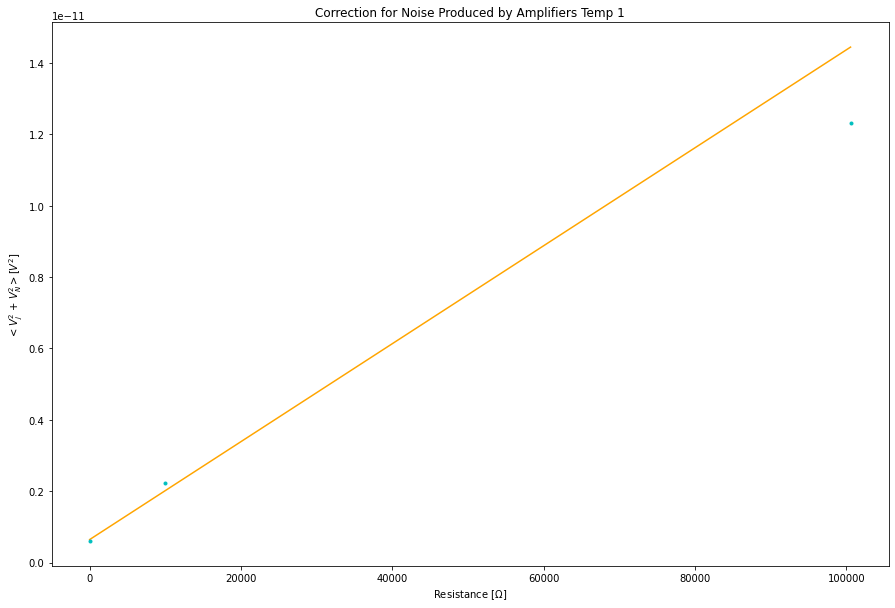

In [21]:
# correction of data for T = ~293
inferred_T1 = arranging_data(mean_293, g_293) # <vj^2 +vn^2>_inferred
inferred_T1_delta = arranging_data(dmean_293,g_293)
x = 'Resistance [$\Omega$]'
y = '$<V_j^2$ + $V_N^2> [V^2]$'
t = 'Correction for Noise Produced by Amplifiers Temp 1'
mT1, bT1, dmT1, dbT1 = plotting_function_linear(12,x,y,t,r_vals_293,inferred_T1,inferred_T1_delta,lin_eqn,'c','orange')


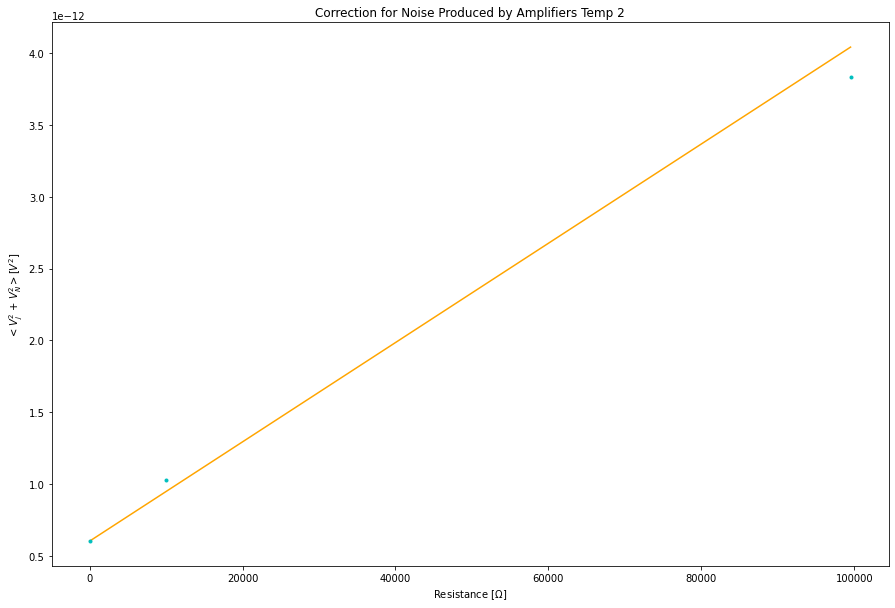

In [22]:
# correction of data for T = ~77
inferred_T2 = arranging_data(mean_77, g_77) # <vj^2 +vn^2>_inferred
inferred_T2_delta = arranging_data(dmean_77,g_77)
x = 'Resistance [$\Omega$]'
y = '$<V_j^2$ + $V_N^2> [V^2]$'
t = 'Correction for Noise Produced by Amplifiers Temp 2'
mT2, bT2, dmT2, dbT2 = plotting_function_linear(13,x,y,t,r_vals_77,inferred_T2,inferred_T2_delta,lin_eqn,'c','orange')

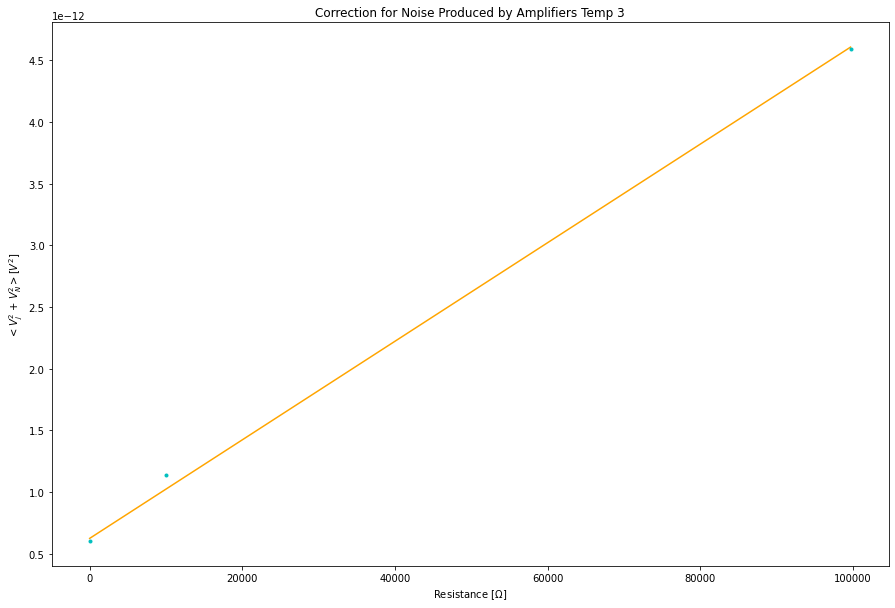

In [23]:
# correction of data for T = ~100
inferred_T3 = arranging_data(mean_100, g_100) # <vj^2 +vn^2>_inferred
inferred_T3_delta = arranging_data(dmean_100,g_100)
x = 'Resistance [$\Omega$]'
y = '$<V_j^2$ + $V_N^2> [V^2]$'
t = 'Correction for Noise Produced by Amplifiers Temp 3'
mT3, bT3, dmT3, dbT3 = plotting_function_linear(14,x,y,t,r_vals_100,inferred_T3,inferred_T3_delta,lin_eqn,'c','orange')

[6.052469135802469e-13, 1.4187499999999998e-12, 6.579166666666667e-12]
6.054883200216384e-17


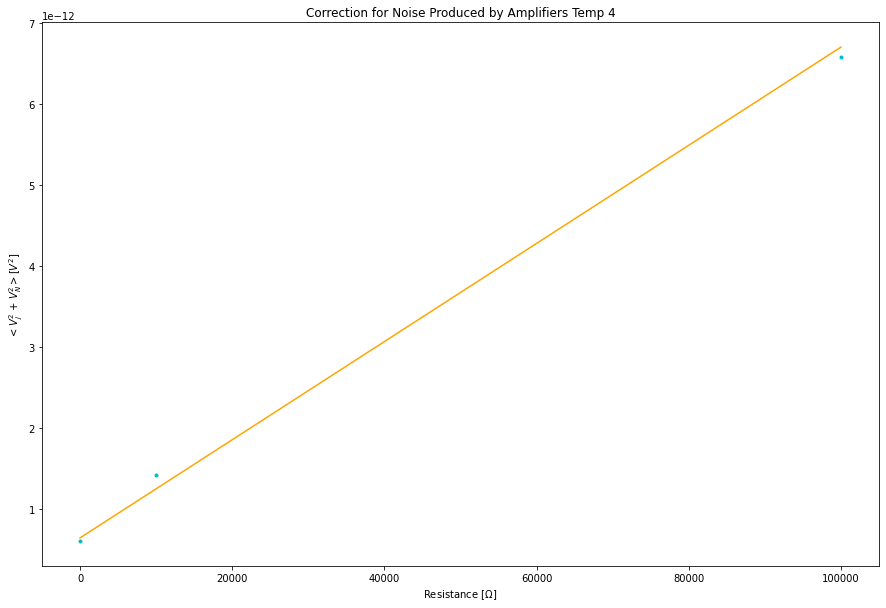

In [24]:
# correction of data for T = ~150
inferred_T4 = arranging_data(mean_150, g_150) # <vj^2 +vn^2>_inferred
inferred_T4_delta = arranging_data(dmean_150,g_150)
x = 'Resistance [$\Omega$]'
y = '$<V_j^2$ + $V_N^2> [V^2]$'
t = 'Correction for Noise Produced by Amplifiers Temp 4'
mT4, bT4, dmT4, dbT4 = plotting_function_linear(15,x,y,t,r_vals_150,inferred_T4,inferred_T4_delta,lin_eqn,'c','orange')
print(inferred_T4)
print(mT4)

Boltzmann's Constant @ Temp 1:  1.2906068946276747e-23  +/-  2.4970617304437934e-25
Boltzmann's Constant @ Temp 2:  1.2867311982474114e-23  +/-  2.4895630465685868e-25
Boltzmann's Constant @ Temp 3:  1.287891460824731e-23  +/-  2.491807918567296e-25
Boltzmann's Constant @ Temp 4:  1.2898298886706442e-23  +/-  2.495558382020889e-25
.................................................................................


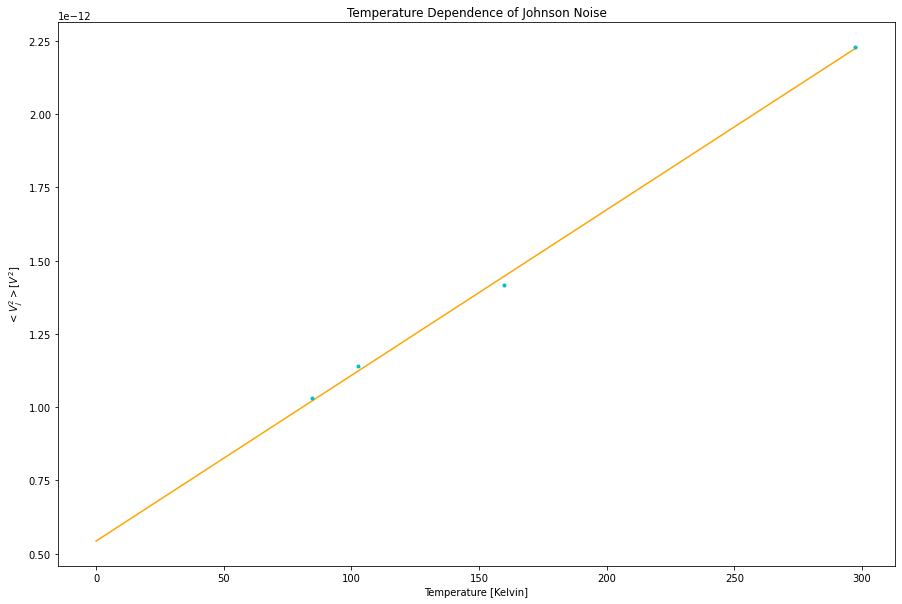

In [25]:
# Using the plots from above to correct data
corrected_T1 = correcting_data(inferred_T1,mT1)
corrected_dT1 = adding_error(inferred_T1_delta, inferred_T1_delta)
corrected_T2 = correcting_data(inferred_T2,mT2)
corrected_dT2 = adding_error(inferred_T2_delta, inferred_T2_delta)
corrected_T3 = correcting_data(inferred_T3,mT3)
corrected_dT3 = adding_error(inferred_T3_delta, inferred_T3_delta)
corrected_T4 = correcting_data(inferred_T4,mT4)
corrected_dT4 = adding_error(inferred_T4_delta, inferred_T4_delta)
tt = 1
ct = np.array([corrected_T1[tt], corrected_T2[tt], corrected_T3[tt],corrected_T4[tt]])
dct = np.array([corrected_dT1[tt], corrected_dT2[tt], corrected_dT3[tt],corrected_dT4[tt]])
x = 'Temperature [Kelvin]'
y = '$<V_j^2> [V^2]$'
t = 'Temperature Dependence of Johnson Noise'
mt, bt, dmt, dbt = plotting_function_linear(16,x,y,t,temp_vals,ct,dct,lin_eqn,'c','orange')

# Extracting kb from temp dependent
kb_t1 = mt / 4/ 10996/rb_293 # the resistance for each temp doesnt really change the value
dkb_t1 = dmt /4/10996/rb_293  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ Temp 1: ", kb_t1, " +/- ", dkb_t1) 
kb_t2 = mt / 4/ 10996/rb_77 # the resistance for each temp doesnt really change the value
dkb_t2 = dmt /4/10996/rb_77  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ Temp 2: ", kb_t2, " +/- ", dkb_t2) 
kb_t3 = mt / 4/ 10996/rb_100 # the resistance for each temp doesnt really change the value
dkb_t3 = dmt /4/10996/rb_100  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ Temp 3: ", kb_t3, " +/- ", dkb_t3) 
kb_t4 = mt / 4/ 10996/rb_150 # the resistance for each temp doesnt really change the value
dkb_t4 = dmt /4/10996/rb_150  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ Temp 4: ", kb_t4, " +/- ", dkb_t4) 
print('.................................................................................')
# Extracting kb from temp dependent
# kb_t1a = mt / 4/ 10996/rc_293 # the resistance for each temp doesnt really change the value
# dkb_t1a = dmt /4/10996/rc_293  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 1: ", kb_t1, " +/- ", dkb_t1) 
# kb_t2a = mt / 4/ 10996/rc_77 # the resistance for each temp doesnt really change the value
# dkb_t2a = dmt /4/10996/rc_77  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 2: ", kb_t2, " +/- ", dkb_t2) 
# kb_t3a = mt / 4/ 10996/rc_100 # the resistance for each temp doesnt really change the value
# dkb_t3a = dmt /4/10996/rc_100  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 3: ", kb_t3, " +/- ", dkb_t3) 
# kb_t4a = mt / 4/ 10996/rc_150 # the resistance for each temp doesnt really change the value
# dkb_t4a = dmt /4/10996/rc_150  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 4: ", kb_t4, " +/- ", dkb_t4) 

In [26]:
# Using only Ra as the correction
# Temperature Dependent
# Data for Temp Dependent
f1_td = 1000  # Hz
f2_td = 10000 # Hz
g1 = 600

#..................................................................................................................................
# Room Temp
# ra_293 = 11.29 # ohm
# rb_293 = 9.96*1000 # ohm
# rc_293 = 100.55*1000 # ohm
# r_vals_293 = np.array([ra_293, rb_293, rc_293])
# v_out_ra_293 = np.array([0.774, 0.774, 0.776, 0.775, 0.778]) # Volts (data for room temp with R = Ra)
# v_out_rb_293 = np.array([0.722, 0.723, 0.721, 0.722, 0.721]) # Volts (data for room temp with R = Rb)
# v_out_rc_293 = np.array([0.997, 0.998, 0.994, 0.998, 0.999]) # Volts (data for room temp with R = Rc)

mean293a = np.array([np.mean(v_out_ra_293)])
dmean293a = np.array([delx(v_out_ra_293)])
g_293a = np.array([6000]) # gain values for room temp data (Rb, Rc)

mean293bc = np.array([np.mean(v_out_rb_293),np.mean(v_out_rc_293)])
dmean293bc = np.array([delx(v_out_rb_293), delx(v_out_rc_293)])
g_293bc = np.array([3000, 1500]) 

c1_293 = 0.438 # microamp


#..................................................................................................................................
# 77 Kelvin
# ra_77 = 11.27 # ohm
# rb_77 = 9.990*1000 # ohm
# rc_77 = 99.52*1000 # ohm
# r_vals_77 = np.array([ra_77, rb_77, rc_77])
# v_out_ra_77 = np.array([0.782, 0.781, 0.780, 0.781, 0.781])
# v_out_rb_77 = np.array([0.931, 0.927, 0.933, 0.922, 0.928])
# v_out_rc_77 = np.array([1.238, 1.250, 1.244, 1.230, 1.244])
mean77a = np.array([np.mean(v_out_ra_77)])
dmean77a = np.array([delx(v_out_ra_77)])
g_77a = np.array([6000]) 

mean77bc = np.array([np.mean(v_out_rb_77),np.mean(v_out_rc_77)])
dmean77bc = np.array([delx(v_out_rb_77), delx(v_out_rc_77)])
g_77bc = np.array([5000,3000])

c1_77 = 0.9899  # microamp
c10_77 = 1.0062 # microamp
#..................................................................................................................................
# 100 Kelvin
# ra_100 = 11.36 # ohm
# rb_100 = 9.981*1000 # ohm
# rc_100 = 99.66*1000 # ohm
# r_vals_100 = np.array([ra_100, rb_100, rc_100])
# v_out_ra_100 = np.array([0.776, 0.778, 0.782, 0.784, 0.784])
# v_out_rb_100 = np.array([1.018, 1.025, 1.027, 1.030, 1.029])
# v_out_rc_100 = np.array([0.662, 0.663, 0.661, 0.662, 0.661])

mean100a = np.array([np.mean(v_out_ra_100)])
mean100bc = np.array([np.mean(v_out_rb_100),np.mean(v_out_rc_100)])
dmean100a = np.array([delx(v_out_ra_100)])
dmean100bc = np.array([delx(v_out_rb_100),delx(v_out_rc_100)])
g_100a = np.array([6000])
g_100bc = np.array([5000, 2000])
c1_100 = 0.943
c10_100 = 0.963

#..................................................................................................................................
# 150 Kelvin
# ra_150 = 11.21 # ohm
# rb_150 = 9.966*1000 # ohm
# rc_150 = 99.98*1000 # ohm
# r_vals_150 = np.array([ra_150, rb_150, rc_150])
# v_out_ra_150 = np.array([0.786, 0.785, 0.787, 0.780, 0.784])
# v_out_rb_150 = np.array([0.814, 0.815, 0.819, 0.820, 0.818])
# v_out_rc_150 = np.array([0.946, 0.950, 0.948, 0.946, 0.947])

mean150a = np.array([np.mean(v_out_ra_150)])
mean150bc = np.array([np.mean(v_out_rb_150),np.mean(v_out_rc_150)])
dmean150a = np.array([delx(v_out_ra_150)])
dmean150bc = np.array([delx(v_out_rb_150),delx(v_out_rc_150)])
g_150a = np.array([6000])
g_150bc = np.array([4000, 2000])
c1_150 = 0.7950
c10_150 = 0.8251
#..................................................................................................................................

# tx = 1
# ctx = np.array([cT1[tx], cT2[tx], cT3[tx],cT4[tx]])
# dctx = np.array([dcT1[tx], dcT2[tx], dcT3[tx],dcT4[tx]])
# x = 'Temperature [Kelvin]]'
# y = '$<V_j^2> [V^2]$'
# t = 'Temperature Dependence of Johnson Noise'
# mtxx, btxx, dmtxx, dbtxx = plotting_function_linear(16,x,y,t,temp_vals,ctx,dctx,lin_eqn,'c','orange')
# # Extracting kb from temp dependent
# kb_t1 = mtxx / 4/ 10996/rb_293 # the resistance for each temp doesnt really change the value
# dkb_t1 = dmtxx /4/10996/rb_293  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 1: ", kb_t1, " +/- ", dkb_t1) 
# kb_t2 = mtxx / 4/ 10996/rb_77 # the resistance for each temp doesnt really change the value
# dkb_t2 = dmtxx /4/10996/rb_77  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 2: ", kb_t2, " +/- ", dkb_t2) 
# kb_t3 = mtxx / 4/ 10996/rb_100 # the resistance for each temp doesnt really change the value
# dkb_t3 = dmtxx /4/10996/rb_100  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 3: ", kb_t3, " +/- ", dkb_t3) 
# kb_t4 = mtxx / 4/ 10996/rb_150 # the resistance for each temp doesnt really change the value
# dkb_t4 = dmtxx /4/10996/rb_150  # the resistance for each temp doesnt really change the value
# print("Boltzmann's Constant @ Temp 4: ", kb_t4, " +/- ", dkb_t4) 

Boltzmann's Constant @  84.42128213223128 :  1.2278522112989598e-23  +/-  6.1204592328386835e-25
Boltzmann's Constant @  102.52103312928699 :  1.228959381913296e-23  +/-  6.125978132056752e-25
Boltzmann's Constant @  159.63751815197867 :  1.2308091100618711e-23  +/-  6.135198448330167e-25
Boltzmann's Constant @  297.4117421594174 :  1.2315505613329927e-23  +/-  6.138894351009884e-25
Boltzmann's Constant:  1.2297910710957323e-23  +/-  6.130821272702618e-25


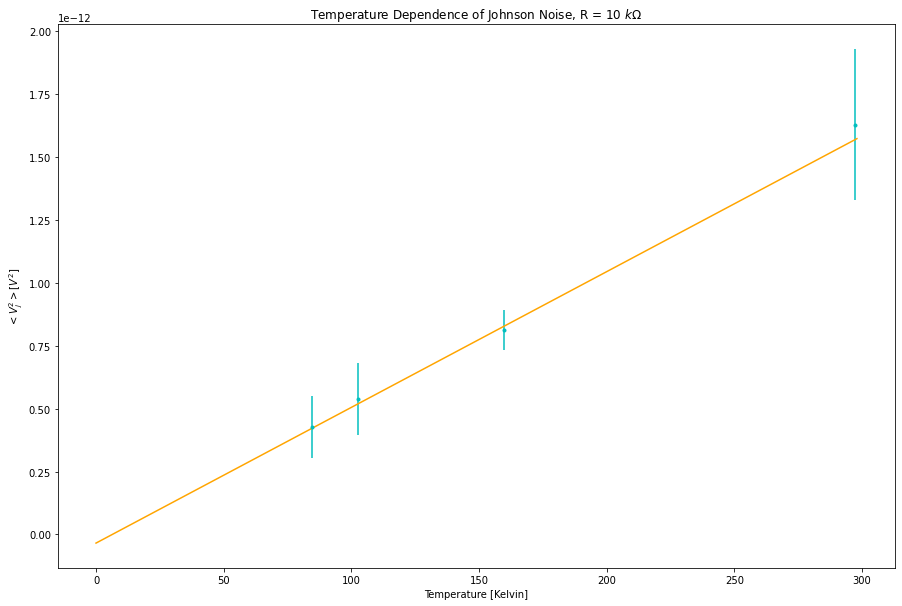

In [27]:
# Using Ra vals to correct Rb and Rc values
rac293 = arranging_data(mean293a,g_293a)
drac293 = arranging_data(np.array([delx(mean293a)]),g_293a)

rac77 = arranging_data(mean77a,g_77a)
drac77 = arranging_data(np.array([delx(mean77a)]),g_77a)

rac150 = arranging_data(mean150a,g_150a)
drac150 = arranging_data(np.array([delx(mean150a)]),g_150a)

rac100 = arranging_data(mean100a,g_100a)
drac100 = arranging_data(np.array([delx(mean100a)]),g_100a)

# inferring the b and c vals
rbc293 = arranging_data(mean293bc,g_293bc)
drbc293 = arranging_data(np.array([delx(mean293bc)]),g_293bc)

rbc77 = arranging_data(mean77bc,g_77bc)
drbc77 = arranging_data(np.array([delx(mean77bc)]),g_77bc)

rbc150 = arranging_data(mean150bc,g_150bc)
drbc150 = arranging_data(np.array([delx(mean150bc)]),g_150bc)

rbc100 = arranging_data(mean100bc,g_100bc)
drbc100 = arranging_data(np.array([delx(mean100bc)]),g_100bc)

#..................................................................................................................................
crbc293 = np.subtract(rbc293,rac293)
dcrbc293 = adding_error(drbc293,drac293)
crbc77 = np.subtract(rbc77,rac77)
dcrbc77 = adding_error(drbc77,drac77)
crbc100 = np.subtract(rbc100,rac100)
dcrbc100 = adding_error(drbc100,drac100)
crbc150 = np.subtract(rbc150,rac150)
dcrbc150 = adding_error(drbc150,drac150)

#..................................................................................................................................
temp_vals_1 = np.array([temp2, temp3, temp4, temp1])
ii = 0
temp_depend_1 = np.array([crbc77[ii],crbc100[ii],crbc150[ii],crbc293[ii]])
dtemp_depend_1 = np.array([dcrbc77[ii],dcrbc100[ii],dcrbc150[ii],dcrbc293[ii]])
ii - 1
temp_depend_2 = np.array([crbc77[ii],crbc100[ii],crbc150[ii],crbc293[ii]])
dtemp_depend_2 = np.array([dcrbc77[ii],dcrbc100[ii],dcrbc150[ii],dcrbc293[ii]])


x = 'Temperature [Kelvin]'
y = '$<V_j^2> [V^2]$'
t = 'Temperature Dependence of Johnson Noise, R = 10 $k\Omega$'
mtb, btb, dmtb, dbtb = plotting_function_linear(17,x,y,t,temp_vals_1,temp_depend_1,dtemp_depend_1,lin_eqn,'c','orange')
kb_rb = mtb / 4/ 10996/rb_77 # the resistance for each temp doesnt really change the value
dkb_rb = dmtb /4/10996/rb_77  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[0],": ", kb_rb, " +/- ", dkb_rb) 
kb_rb = mtb / 4/ 10996/rb_100 # the resistance for each temp doesnt really change the value
dkb_rb = dmtb /4/10996/rb_100  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[1],": ", kb_rb, " +/- ", dkb_rb) 
kb_rb = mtb / 4/ 10996/rb_150 # the resistance for each temp doesnt really change the value
dkb_rb = dmtb /4/10996/rb_150  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[2],": ", kb_rb, " +/- ", dkb_rb) 
kb_rb = mtb / 4/ 10996/rb_293 # the resistance for each temp doesnt really change the value
dkb_rb = dmtb /4/10996/rb_293  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[3],": ", kb_rb, " +/- ", dkb_rb) 

#..................................................................................................................................
# R val averaged
rb_vals = np.array([rb_77,rb_100,rb_150,rb_293])
rb_avg = np.mean(rb_vals)
drb_avg = np.array([delx(rb_vals)])

kb_rb = mtb/4/10996/rb_avg
dkb_rb = (1/4/10996) * prop_error_div2(mtb, rb_avg, dmtb, drb_avg)
print("Boltzmann's Constant: ", kb_rb, " +/- ", dkb_rb) 

Boltzmann's Constant @  84.42128213223128 :  1.2325405537456399e-24  +/-  6.14382915354285e-26
Boltzmann's Constant @  102.52103312928699 :  1.2308091100618712e-24  +/-  6.135198448330167e-26
Boltzmann's Constant @  159.63751815197867 :  1.2268697330342677e-24  +/-  6.115561885983041e-26
Boltzmann's Constant @  297.4117421594174 :  1.2199148275362117e-24  +/-  6.080893857390199e-26
Boltzmann's Constant:  1.227514306960207e-24  +/-  6.126945471476336e-26


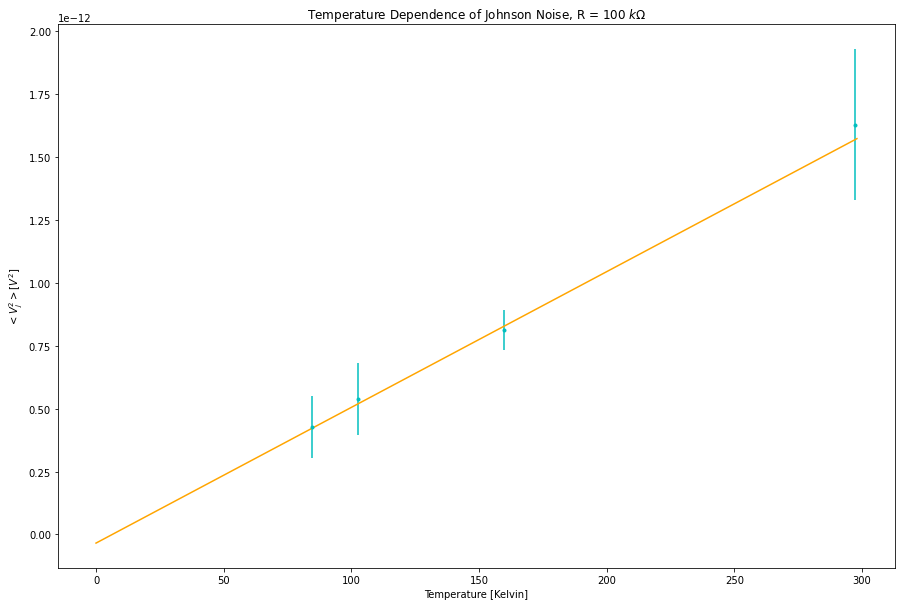

In [28]:
t = 'Temperature Dependence of Johnson Noise, R = 100 $k\Omega$'
mtc, btc, dmtc, dbtc = plotting_function_linear(18,x,y,t,temp_vals_1,temp_depend_2,dtemp_depend_2,lin_eqn,'c','orange')
kb_rc = mtc / 4/ 10996/rc_77 # the resistance for each temp doesnt really change the value
dkb_rc = dmtc /4/10996/rc_77  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[0],": ", kb_rc, " +/- ", dkb_rc) 
kb_rc = mtc / 4/ 10996/rc_100 # the resistance for each temp doesnt really change the value
dkb_rc = dmtc /4/10996/rc_100  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[1],": ", kb_rc, " +/- ", dkb_rc) 
kb_rc = mtc / 4/ 10996/rc_150 # the resistance for each temp doesnt really change the value
dkb_rc = dmtc /4/10996/rc_150  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[2],": ", kb_rc, " +/- ", dkb_rc) 
kb_rc = mtc / 4/ 10996/rc_293 # the resistance for each temp doesnt really change the value
dkb_rc = dmtc /4/10996/rc_293  # the resistance for each temp doesnt really change the value
print("Boltzmann's Constant @ ", temp_vals_1[3],": ", kb_rc, " +/- ", dkb_rc) 

#..................................................................................................................................
# R val averaged
rc_vals = np.array([rc_77,rc_100,rc_150,rc_293])
rc_avg = np.mean(rc_vals)
drc_avg = np.array([delx(rc_vals)])

kb_rb = mtb/4/10996/rc_avg
dkb_rb = (1/4/10996) * prop_error_div2(mtc, rc_avg, dmtc, drc_avg)
print("Boltzmann's Constant: ", kb_rb, " +/- ", dkb_rb) 